# Make some matplotlib plots using uproot

Now that you know how to open and explore a root TTree using `uproot`, it's time to make some histograms and plots using a plotting library. Instead of using ROOT for that, we will try to use the very common `matplotlib` libraries for that purpose since these have a very large support from the python community and they are also easier to use than ROOT for plotting.

Firstly, let's load our TTree with `uproot` again:

In [4]:
import uproot as ur
filename='/eos/home-v/valentem/work/ATLAS/HH/HL-LHC/grid_outputs/user.valentem.HH4B.600463.hh_signals..AB21.2.163.valentem_hllhc_2021-04-29_2.full_nonres_MiniNTuple.root/user.valentem.25450677._000001.MiniNTuple.root'
file = ur.open(filename)

tree_name='XhhMiniNtuple'
tree = file[tree_name]
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int64_t                  | AsDtype('>i8')
lumiBlock            | int32_t                  | AsDtype('>i4')
coreFlags            | uint32_t                 | AsDtype('>u4')
bcid                 | int32_t                  | AsDtype('>i4')
mcEventNumber        | int32_t                  | AsDtype('>i4')
mcChannelNumber      | int32_t                  | AsDtype('>i4')
mcEventWeight        | float                    | AsDtype('>f4')
NPV                  | int32_t                  | AsDtype('>i4')
actualInteraction... | float                    | AsDtype('>f4')
averageInteractio... | float                    | AsDtype('>f4')
weight_pileup        | float                    | AsDtype('>f4')
correctedAverageMu   | float                    | AsDtype(

Ok, now that the tree is loaded let's use matplotlib to make some plots. For example, the histograms of the jet $p_T$. Firstly, we need to load our variable containing the jets of every event.

In [13]:
jet_pts = tree['resolvedJets_pt'].array()
print(type(jet_pts))

<class 'awkward.highlevel.Array'>


You can see that the `jet_pts` object is not really a numpy object, it is an awkward array. This is because numpy arrays the allow bi-dimensional data, but only with constant size! This feature is generally not the case in particle physics as, for example, different pp collisions would probably be recorded with a different number of jets and so the vectors of jet quantities would have different sizes across the dataset. For this reason we have a specific library allowing to have variable-sized data, and this is called `awkward`. You can find more infomations here: https://awkward-array.readthedocs.io/en/latest/index.html

However, it's time now to create an histogram for the jet $p_T$! I assume here that you know what a histogram is. If not please check some documentation online before moving forward.

In order to fill our histogram with **all** the jets $p_T$ for every event, we have to transform our `jet_pts` variable from a variable-size 2D array to a 1D vector. This can be done using the `flatten` function of awkward:

In [31]:
import awkward as ak
jet_pts_flat = ak.flatten(jet_pts)
print('This is now a 1D vector as you can see here:',jet_pts_flat)

This is now a 1D vector as you can see here: [85.9, 70.5, 59.7, 59, 57.9, 52.5, 46.2, ... 24.1, 23.4, 21.5, 21.2, 20.9, 20.4]


We can now create an histogram using `numpy` and specifying how many bins and range we want to use for that:

In [39]:
import numpy as np
counts, edges = np.histogram(jet_pts_flat, bins=120, range=(0, 120))
print('edges:',edges)
print('counts:',counts)

edges: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120.]
counts: [     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
 188293 180804 165426 147404 128695 109510  93716  80737  71750  63070
  56160  50375  45569  42185  39051  36954  35326  33784  33391  32924
  32275  32428  32308  32510  32718  33077  33129  33032  33191  33230
  33401  33095 

You can see here that `edges` contains the edges of the bins (i.e. the 120 bins between 0 and 120) while `counts` contains the number of jets counted in each bin.

We are now ready to produce a plot of our histogram using `matplotlib`. Here's an example

Text(0, 0.5, 'Events per bin')

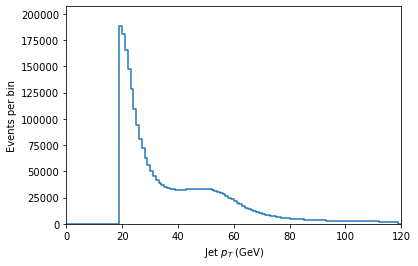

In [40]:
import matplotlib.pyplot as plt

plt.step(x=edges, y=np.append(counts, 0)) #This makes a histogram plot
plt.xlim(edges[0], edges[-1]) #Here you can set the x-limits
plt.ylim(0, counts.max() * 1.1) #Here you can set the y-limits

#And here you set the labels
plt.xlabel("Jet $p_T$ (GeV)")
plt.ylabel("Events per bin")

I can try to repeat the same procedure but only for jets with $p_T>100\;\text{GeV}$. This is easy using the technique explored in the previous notebook.

In [41]:
sel = jet_pts>100
jet_pts_100 = ak.flatten(jet_pts[sel]) #I am already flattening here
print(jet_pts_100)

[146, 283, 243, 139, 166, 138, 223, 103, ... 165, 143, 125, 195, 170, 185, 150, 126]


Now I can create the histogram and plot as above:

Text(0, 0.5, 'Events per bin')

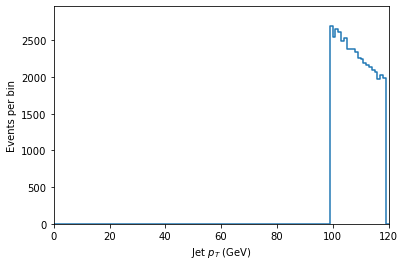

In [42]:
import numpy as np
counts, edges = np.histogram(jet_pts_100, bins=120, range=(0, 120))

plt.step(x=edges, y=np.append(counts, 0)) #This makes a histogram plot
plt.xlim(edges[0], edges[-1]) #Here you can set the x-limits
plt.ylim(0, counts.max() * 1.1) #Here you can set the y-limits

#And here you set the labels
plt.xlabel("Jet $p_T$ (GeV)")
plt.ylabel("Events per bin")

And if everything looks fine you should see that the histograms starts at 100 GeV. :) So, now I propose that you make more plots of your variables, trying to play a bit with the cuts in order to understand better how the variables behave. You can also make some 2D plots of the jets to learn more about 2D matplotlib plots.